# Magic Towns of Mexico
¿How “turisty” is a Magic Town?

# Import dependencies

In [65]:
import time 
import requests
from pprint import pprint
import csv
import pandas as pd
from config import key_rapid as api_key_rapid
from config import gkey as gkey_google
from requests.exceptions import HTTPError
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import googlemaps
import gmaps
import os
from matplotlib.pyplot import figure


# Data sources 1
Data source 1: The list for The Magic Towns in Mexico is available in: https://www.gob.mx/sectur/articulos/pueblos-magicos-206528
This information was exported into a csv where a concatenation was made for the analysis

In [66]:
# Import list of magic towns 
magic_towns = pd.read_csv('Resources/pueblos_magicos.csv')
magic_towns_city = magic_towns.iloc[:,2]
magic_towns_city

0             Aculco, Estado de Mexico
1                      Alamos,  Sonora
2                   Amealco, Queretaro
3           Aquismon,  San Luis Potosi
4                   Arteaga,  Coahuila
                    ...               
116           Xilitla, San Luis Potosi
117               Yuriria,  Guanajuato
118                  Zacatlan,  Puebla
119                  Zimapan,  Hidalgo
120    Zozocolco de Hidalgo,  Veracruz
Name: Ciudad_Estado , Length: 121, dtype: object

# Data sources 2
Data source 2: From Rapid Api we choosed Hoteles.com Api to retrieve the data (https://rapidapi.com/apidojo/api/hotels4/endpoints)
For Magic towns locations we used locations/search end point

In [6]:
#This function is to obtain city's latitude, longitude and ID.
# Parameters:
#      city: the name of the city that you are looking for
#      try_number : try counter 
#Returns: a json list 

def CallApi_locations(city, try_number):
    
    response_locations = []
    try_again = True
    
    # API request
    url = "https://hotels4.p.rapidapi.com/locations/search"
    
    headers = {
            'x-rapidapi-host': "hotels4.p.rapidapi.com",
            'x-rapidapi-key': api_key_rapid
            }

    querystring = {"locale":"en_MX","query":city}

    try:
        #API is handling exceptions and always returning 200 status with empty responses 
        while try_again == True and try_number < 2:
            
            # wait for 5sec if there was an error before doing the next API call 
            if try_number > 0:
                time.sleep(5)
            
            response = requests.request("GET", url, headers=headers, params=querystring)
            
            
            # If the response was successful, no Exception will be raised
            response.raise_for_status()
            
             #get json response 
            response_locations = response.json()
            
            #If result is not valid try again (sometimes when you execute again you get results)
            if len(response_locations['suggestions'][0]['entities']) == 0:
                try_again = True
                try_number += 1
                print(f'Error: EMPTY RESPONSE, City: {city}, TryAgain: {try_again}, TryNumber: {try_number}')
            else:
                try_again = False
                print(f'Success!, City: {city}, TryAgain: {try_again}, TryNumber: {try_number}')
            
    
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}, City: {city}, TryAgain: {try_again}, TryNumber: {try_number}')
        # retry api call
        try_number += 1
        return CallApi_locations(city, try_number)
        
    except Exception as err:
        print(f'Other error occurred: {err}, City: {city}, TryAgain: {try_again}, TryNumber: {try_number}')
        # retry api call
        try_number += 1
        return CallApi_locations(city, try_number)
    
    return response_locations


In [69]:
# Lists to form the basic town information data frame
lat = [] #latitud list for airport search
lon = [] #longitud list for airport search 
name= [] #city name
destinationID = [] #city API Id for second endpoint (hotel's details)
state_caption = [] # magic town state  

In [8]:
# Append data to lists 
for city in magic_towns_city:
    
    try:
        response_locations = CallApi_locations(city, 0)
        if len(response_locations) != 0:
            lat.append(response_locations['suggestions'][0]['entities'][0]['latitude'])
            lon.append(response_locations['suggestions'][0]['entities'][0]['longitude'])
            name.append(response_locations['suggestions'][0]['entities'][0]['name'])
            destinationID.append(response_locations['suggestions'][0]['entities'][0]['destinationId'])
            state_caption.append(response_locations['suggestions'][0]['entities'][0]['caption'])
            
            print(f'{city} added successfully')
        
    except Exception as err:
        print(f'Other error occurred: {err}, City: {city}')


Success!, City: Aculco, Estado de Mexico, TryAgain: False, TryNumber: 0
Aculco, Estado de Mexico added successfully
Success!, City: Alamos,  Sonora, TryAgain: False, TryNumber: 0
Alamos,  Sonora added successfully
Success!, City: Amealco, Queretaro, TryAgain: False, TryNumber: 0
Amealco, Queretaro added successfully
Success!, City: Aquismon,  San Luis Potosi, TryAgain: False, TryNumber: 0
Aquismon,  San Luis Potosi added successfully
Success!, City: Arteaga,  Coahuila, TryAgain: False, TryNumber: 0
Arteaga,  Coahuila added successfully
Success!, City: Atlixco,  Puebla, TryAgain: False, TryNumber: 0
Atlixco,  Puebla added successfully
Success!, City: Bacalar,  Quintana Roo, TryAgain: False, TryNumber: 0
Bacalar,  Quintana Roo added successfully
Success!, City: Batopilas,  Chihuahua, TryAgain: False, TryNumber: 0
Batopilas,  Chihuahua added successfully
Success!, City: Bustamante,  Nuevo Leon, TryAgain: False, TryNumber: 0
Bustamante,  Nuevo Leon added successfully
Success!, City: Cadere

Success!, City: Palizada,  Campeche, TryAgain: False, TryNumber: 0
Palizada,  Campeche added successfully
Success!, City: Papantla,  Veracruz, TryAgain: False, TryNumber: 0
Papantla,  Veracruz added successfully
Other error occurred: list indices must be integers or slices, not str, City: Parras de la Fuente,  Coahuila, TryAgain: True, TryNumber: 0
Success!, City: Parras de la Fuente,  Coahuila, TryAgain: False, TryNumber: 1
Parras de la Fuente,  Coahuila added successfully
Success!, City: Patzcuaro, Michoacan, TryAgain: False, TryNumber: 0
Patzcuaro, Michoacan added successfully
Success!, City: Pinos,  Zacatecas, TryAgain: False, TryNumber: 0
Pinos,  Zacatecas added successfully
Success!, City: Asientos,  Aguascalientes, TryAgain: False, TryNumber: 0
Asientos,  Aguascalientes added successfully
Success!, City: Real de Catorce,  San Luis Potosi, TryAgain: False, TryNumber: 0
Real de Catorce,  San Luis Potosi added successfully
Success!, City: Mineral del Monte,  Hidalgo, TryAgain: Fals

In [10]:
#Data frame of the basic information per town
town_basic_data = pd.DataFrame({'Magic Town':name,'Latitude':lat,'Longitud':lon,'Destination Id':destinationID})

# Export data to csv file 
town_basic_data.to_csv('Outputs/towns_data.csv',index=False)
town_basic_data

,Magic Town,Latitude,Longitud,Destination Id
0,Aculco,20.089649,-99.759271,1904726
1,Alamos,27.051123,-108.876941,863503
2,Amealco,20.196826,-100.070282,851540
3,Aquismon,21.614999,-99.084884,857225
4,Arteaga,25.341357,-100.642369,830058
...,...,...,...,...
115,Xilitla,21.386644,-98.981200,847236
116,Yuriria,20.183209,-101.225477,850818
117,Zacatlán,19.964917,-97.999007,831864
118,Zimapan,20.738095,-99.382114,832516


In [11]:
# Extract API Internal Id from town_basic_data
town_basic_data_id = town_basic_data.loc[:,'Destination Id']

# Data sources 2
Data source 2: From Rapid Api we choosed Hoteles.com Api to retrieve the data (https://rapidapi.com/apidojo/api/hotels4/endpoints) 
For Magic towns landmarks and hotel characteristics we used properties/list end point

In [12]:
#This function is to obtain city's hotels and realted information.
# Parameters:
#      det_id: API Internal Id (obtained in the first endpoint)
#      page: page to search (related to total hotels per town, max results per page is 25)
#      try_number : try counter 
#Returns: a tupple of: json response and a flag.  

def CallApi_Hotels(det_id, page, try_number):
    try_again = True
    response_details_json = []
    
    # API request page 1 (inital request)
    url = "https://hotels4.p.rapidapi.com/properties/list"
    
    querystring = {"currency":"MXN","locale":"en_MX","destinationId":det_id,"pageNumber":f'{page}',
                   "checkIn":"2020-10-04","checkOut":"2020-10-10","pageSize":"25","adults1":"2"}
    
    headers = {
        'x-rapidapi-host': "hotels4.p.rapidapi.com",
        'x-rapidapi-key': api_key_rapid
    }
    
    try:
        #hotels API is handling exceptions and always returning 200 status with different json 
        while try_again == True and try_number < 3:
            # wait for 5sec if there was an error before doing the next API call 
            if try_number > 0:
                time.sleep(5)
            
            response_details = requests.request("GET", url, headers=headers, params=querystring)
            
            # If the response was successful, no Exception will be raised
            response_details.raise_for_status()
            
            #Get json response
            response_details_json = response_details.json()
            
            #If result is "ERROR" print the details and try again
            if response_details_json['result'] == 'ERROR':
                try_again = True
                try_number += 1
                print(f'Error: {response_details_json["error_message"]}, Page: {page}, Destination: {det_id}, Try Number: {try_number}, TryAgain: {try_again}')
            else:
                try_again = False
                print(f'Success! Page: {page}, Destination: {det_id}, Try Number: {try_number}, TryAgain: {try_again}')
    
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}, Page: {page}, Destination: {det_id}, Try Number: {try_number}, TryAgain: {try_again}')
        # retry api call
        try_number += 1
        return CallApi_Hotels(det_id, page,try_number)
    except Exception as err:
        print(f'Other error occurred: {err}, Page: {page}, Destination: {det_id}, Try Number: {try_number}, TryAgain: {try_again}')
        # retry api call
        try_number += 1
        return CallApi_Hotels(det_id, page,try_number)
    
    return response_details_json, try_again



In [70]:
# Lists to form the landmarks data frame  per magic town
town_id=[]
landmarks=[]
id_landmark = []
town_landmarks_data = []

#Lists to form the hotels data frame per magic town 
town_id_hotel=[]
hotel_name=[]
star_rating = []
price_per_night=[]
rooms_left=[]
total_guest_rev = []
rating_guest_rev=[]
locality=[]
hotel_type = []
id_hotel = []

In [14]:
# Append hotels for each magic town to lists
for det_id in town_basic_data_id:
    
    # Variables
    page = 1
    processed_hotels = 0
    
     
    response_details_json,is_success = CallApi_Hotels(det_id, page, 0)    
    
    # if no errors then process json result
    if is_success == False:
        #Obtain landmarks
        try:
            for mark in response_details_json['data']['body']['filters']['landmarks']['items']:
                town_id.append(det_id)
                landmarks.append(mark['label'])
                id_landmark.append(mark['value'])
        except:
            town_id.append(det_id)
            landmarks.append('No landmarks')
            id_landmark.append('No landmarks')
        
        #Obtain total of hotels for magic town (page 1)
        total_hotels = response_details_json['data']['body']['searchResults']['totalCount']
        
        while total_hotels > processed_hotels:
            # Retrieve results starting from pag 2
            if processed_hotels > 0:
                page += 1
                response_details_json,is_success = CallApi_Hotels(det_id, page, 0)
                
            # if no errors then process json result. Double check is needed because we need to check
            # status of the response for next api calls(pages 2, 3...)
            if is_success == False:
                
                # This validation is to make sure that there are hotels in the jason result
                if len(response_details_json['data']['body']['searchResults']['results']) == 0:
                    break
                
                #Add hotels to lists    
                for hotel in response_details_json['data']['body']['searchResults']['results']:
                    # Do not add duplicates
                    if hotel['id'] not in id_hotel:
                        town_id_hotel.append(det_id)
                        hotel_name.append(hotel['name'])
                        star_rating.append(hotel['starRating'])
                        locality.append(hotel['address']['locality'])
                        id_hotel.append(hotel['id'])
                        
                        try:
                            total_guest_rev.append(hotel['guestReviews']['total'])
                            rating_guest_rev.append(hotel['guestReviews']['rating'])
                        except:
                            total_guest_rev.append(0)
                            rating_guest_rev.append('NA')
                        
                        try:
                            hotel_type.append(hotel['vrBadge'])
                        except:
                            hotel_type.append('Hotel')
                        
                        try:
                            price_per_night.append(hotel['ratePlan']['price']['current'])
                        except:
                            price_per_night.append(0)
                        
                        try:
                            rooms_left.append(hotel['roomsLeft'])
                        except:
                            rooms_left.append(0)
                    
                    processed_hotels += 1

Success! Page: 1, Destination: 1904726, Try Number: 0, TryAgain: False
HTTP error occurred: 403 Client Error: Forbidden for url: https://hotels4.p.rapidapi.com/properties/list?currency=MXN&locale=en_MX&destinationId=1904726&pageNumber=2&checkIn=2020-10-04&checkOut=2020-10-10&pageSize=25&adults1=2, Page: 2, Destination: 1904726, Try Number: 0, TryAgain: True
Success! Page: 2, Destination: 1904726, Try Number: 1, TryAgain: False
Success! Page: 1, Destination: 863503, Try Number: 0, TryAgain: False
Success! Page: 2, Destination: 863503, Try Number: 0, TryAgain: False
Success! Page: 1, Destination: 851540, Try Number: 0, TryAgain: False
Success! Page: 2, Destination: 851540, Try Number: 0, TryAgain: False
Success! Page: 3, Destination: 851540, Try Number: 0, TryAgain: False
Success! Page: 1, Destination: 857225, Try Number: 0, TryAgain: False
Success! Page: 2, Destination: 857225, Try Number: 0, TryAgain: False
Success! Page: 3, Destination: 857225, Try Number: 0, TryAgain: False
Success! 

Success! Page: 4, Destination: 1640005, Try Number: 0, TryAgain: False
HTTP error occurred: 403 Client Error: Forbidden for url: https://hotels4.p.rapidapi.com/properties/list?currency=MXN&locale=en_MX&destinationId=1640005&pageNumber=5&checkIn=2020-10-04&checkOut=2020-10-10&pageSize=25&adults1=2, Page: 5, Destination: 1640005, Try Number: 0, TryAgain: True
HTTP error occurred: 403 Client Error: Forbidden for url: https://hotels4.p.rapidapi.com/properties/list?currency=MXN&locale=en_MX&destinationId=1640005&pageNumber=5&checkIn=2020-10-04&checkOut=2020-10-10&pageSize=25&adults1=2, Page: 5, Destination: 1640005, Try Number: 1, TryAgain: True
Success! Page: 5, Destination: 1640005, Try Number: 2, TryAgain: False
Success! Page: 6, Destination: 1640005, Try Number: 0, TryAgain: False
Error: Service Unavailable, Page: 7, Destination: 1640005, Try Number: 1, TryAgain: True
Success! Page: 7, Destination: 1640005, Try Number: 1, TryAgain: False
Success! Page: 8, Destination: 1640005, Try Numbe

Success! Page: 1, Destination: 854004, Try Number: 1, TryAgain: False
Success! Page: 2, Destination: 854004, Try Number: 0, TryAgain: False
Success! Page: 3, Destination: 854004, Try Number: 0, TryAgain: False
Success! Page: 1, Destination: 833628, Try Number: 0, TryAgain: False
Success! Page: 2, Destination: 833628, Try Number: 0, TryAgain: False
Error: Service Unavailable, Page: 1, Destination: 1697743, Try Number: 1, TryAgain: True
Success! Page: 1, Destination: 1697743, Try Number: 1, TryAgain: False
Success! Page: 2, Destination: 1697743, Try Number: 0, TryAgain: False
Success! Page: 1, Destination: 844731, Try Number: 0, TryAgain: False
Success! Page: 1, Destination: 10391401, Try Number: 0, TryAgain: False
Success! Page: 2, Destination: 10391401, Try Number: 0, TryAgain: False
Success! Page: 3, Destination: 10391401, Try Number: 0, TryAgain: False
Success! Page: 1, Destination: 829596, Try Number: 0, TryAgain: False
Success! Page: 2, Destination: 829596, Try Number: 0, TryAgain:

Success! Page: 2, Destination: 843470, Try Number: 1, TryAgain: False
Success! Page: 3, Destination: 843470, Try Number: 0, TryAgain: False
Success! Page: 4, Destination: 843470, Try Number: 0, TryAgain: False
HTTP error occurred: 403 Client Error: Forbidden for url: https://hotels4.p.rapidapi.com/properties/list?currency=MXN&locale=en_MX&destinationId=834975&pageNumber=1&checkIn=2020-10-04&checkOut=2020-10-10&pageSize=25&adults1=2, Page: 1, Destination: 834975, Try Number: 0, TryAgain: True
Success! Page: 1, Destination: 834975, Try Number: 1, TryAgain: False
Success! Page: 1, Destination: 849911, Try Number: 0, TryAgain: False
Success! Page: 2, Destination: 849911, Try Number: 0, TryAgain: False
Success! Page: 1, Destination: 830922, Try Number: 0, TryAgain: False
Success! Page: 2, Destination: 830922, Try Number: 0, TryAgain: False
Success! Page: 1, Destination: 847305, Try Number: 0, TryAgain: False
Success! Page: 2, Destination: 847305, Try Number: 0, TryAgain: False
Success! Page

Success! Page: 5, Destination: 862952, Try Number: 0, TryAgain: False
Success! Page: 6, Destination: 862952, Try Number: 0, TryAgain: False
Success! Page: 7, Destination: 862952, Try Number: 0, TryAgain: False
Success! Page: 8, Destination: 862952, Try Number: 0, TryAgain: False
Success! Page: 9, Destination: 862952, Try Number: 0, TryAgain: False
Success! Page: 10, Destination: 862952, Try Number: 0, TryAgain: False
Success! Page: 11, Destination: 862952, Try Number: 0, TryAgain: False
Error: Service Unavailable, Page: 12, Destination: 862952, Try Number: 1, TryAgain: True
Error: Service Unavailable, Page: 12, Destination: 862952, Try Number: 2, TryAgain: True
Success! Page: 12, Destination: 862952, Try Number: 2, TryAgain: False
Success! Page: 13, Destination: 862952, Try Number: 0, TryAgain: False
Success! Page: 14, Destination: 862952, Try Number: 0, TryAgain: False
Success! Page: 15, Destination: 862952, Try Number: 0, TryAgain: False
Success! Page: 16, Destination: 862952, Try Nu

Success! Page: 30, Destination: 847863, Try Number: 0, TryAgain: False
Success! Page: 31, Destination: 847863, Try Number: 0, TryAgain: False
Success! Page: 32, Destination: 847863, Try Number: 0, TryAgain: False
Success! Page: 33, Destination: 847863, Try Number: 0, TryAgain: False
Success! Page: 34, Destination: 847863, Try Number: 0, TryAgain: False
Success! Page: 35, Destination: 847863, Try Number: 0, TryAgain: False
Success! Page: 36, Destination: 847863, Try Number: 0, TryAgain: False
Success! Page: 37, Destination: 847863, Try Number: 0, TryAgain: False
Success! Page: 38, Destination: 847863, Try Number: 0, TryAgain: False
Success! Page: 1, Destination: 841212, Try Number: 0, TryAgain: False
Success! Page: 2, Destination: 841212, Try Number: 0, TryAgain: False
Success! Page: 3, Destination: 841212, Try Number: 0, TryAgain: False
Success! Page: 4, Destination: 841212, Try Number: 0, TryAgain: False
HTTP error occurred: 403 Client Error: Forbidden for url: https://hotels4.p.rapid

HTTP error occurred: 403 Client Error: Forbidden for url: https://hotels4.p.rapidapi.com/properties/list?currency=MXN&locale=en_MX&destinationId=859870&pageNumber=28&checkIn=2020-10-04&checkOut=2020-10-10&pageSize=25&adults1=2, Page: 28, Destination: 859870, Try Number: 0, TryAgain: True
Success! Page: 28, Destination: 859870, Try Number: 1, TryAgain: False
Success! Page: 29, Destination: 859870, Try Number: 0, TryAgain: False
Success! Page: 30, Destination: 859870, Try Number: 0, TryAgain: False
Success! Page: 31, Destination: 859870, Try Number: 0, TryAgain: False
Success! Page: 32, Destination: 859870, Try Number: 0, TryAgain: False
Success! Page: 33, Destination: 859870, Try Number: 0, TryAgain: False
Success! Page: 34, Destination: 859870, Try Number: 0, TryAgain: False
Success! Page: 35, Destination: 859870, Try Number: 0, TryAgain: False
Success! Page: 36, Destination: 859870, Try Number: 0, TryAgain: False
HTTP error occurred: 403 Client Error: Forbidden for url: https://hotels

# Saving dataframes
Since the Api performance was deficient we saved the data into 3 diferent csv before the analyisis process

In [68]:
#Data frame of the landmarks
town_landmarks_data = pd.DataFrame({'Destination Id':town_id,'Landmarks':landmarks,'Landmark ID':id_landmark})

#Data farem of hotels per magic town 
town_hotels_data = pd.DataFrame({'Destination Id':town_id_hotel,'Hotel Name':hotel_name, 'Hotel ID':id_hotel,'Star rating':star_rating,
                                'Locality':locality,'Guest Reviews':total_guest_rev,'Guest Review Rating':rating_guest_rev,
                                'Hotel type':hotel_type,'Price per night':price_per_night,'Rooms left':rooms_left})

#Export data to csv files
town_hotels_data.to_csv('Outputs/town_hotels.csv',index=False)
town_landmarks_data.to_csv('Outputs/town_landmarks.csv',index=False)
town_hotels_data

NameError: name 'town_id' is not defined

In [81]:
# It takes about 1,000 calls to the API (https://hotels4.p.rapidapi.com) to obtain all the hotels information for each 
# magic town. That's why we are doing this step, to use the data that we already saved in an .csv file 

## -------Import basic information per magic town--------## 
town_basic_data = pd.read_csv('Outputs/towns_data.csv')
town_basic_data


## -------Import landmarks per town--------## 
town_landmarks_data = pd.read_csv('Outputs/town_landmarks.csv')
town_landmarks_data

            
## -------Import hotels per town--------## 
town_hotels_data = pd.read_csv('Outputs/town_hotels.csv')
town_hotels_data


,Destination Id,Hotel Name,Hotel ID,Star rating,Locality,Guest Reviews,Guest Review Rating,Hotel type,Price per night,Rooms left
0,1904726,Collection O Xani Mui Hotel Boutique,572330,2.5,Aculco,0,NaN,Hotel,MXN 533,1
1,1904726,Hotel Aculco,1623938048,2.5,Aculco,0,NaN,Hotel,"MXN 1,652",0
2,1904726,Hotel La Esperanza,572268,2.5,Aculco,0,NaN,Hotel,0,0
3,1904726,HOH Hotel,643875040,3.5,Aculco,11,7.6,Hotel,0,0
4,1904726,Mision La Muralla,236511,2.5,Amealco,149,8.8,Hotel,0,0
...,...,...,...,...,...,...,...,...,...,...
6484,847236,Hotel Paraíso Huasteco,487172,2.5,Tamazunchale,12,6.4,Hotel,0,0
6485,847236,Sierra Huasteca Tamazunchale,570859,2.5,Tamazunchale,12,8.6,Hotel,0,0
6486,847236,HI Huasteca Inn Hotel,1424871936,3.0,Matlapa,3,7.4,Hotel,0,0
6487,832516,Hotel Antonio,1456639264,2.5,Ixmiquilpan,1,8.0,Hotel,MXN 250,0


# Analysis
Each Analysis contains its own data cleaning process

# Accessibility Analysis
In order to mesure accessibility for Magic Towns we selected those with Airports nearby. For this analysis we used google places API 

In [80]:
# Add Airports columns to town_basic_data Data Frame  
town_basic_data["Airport Name"] = ""
town_basic_data["Airport Address"]= ""
town_basic_data["Airport Rating"] = ""
town_basic_data

,Magic Town,Latitude,Longitud,Destination Id,Airport Name,Airport Address,Airport Rating,Airport Nearby
0,Aculco,20.089649,-99.759271,1904726,,,,No
1,Alamos,27.051123,-108.876941,863503,,,,No
2,Amealco,20.196826,-100.070282,851540,,,,No
3,Aquismon,21.614999,-99.084884,857225,,,,No
4,Arteaga,25.341357,-100.642369,830058,,,,No
...,...,...,...,...,...,...,...,...
115,Xilitla,21.386644,-98.981200,847236,,,,No
116,Yuriria,20.183209,-101.225477,850818,,,,No
117,Zacatlán,19.964917,-97.999007,831864,,,,No
118,Zimapan,20.738095,-99.382114,832516,,,,No


In [5]:
##----- Search of airports near to each magic town (no more than 80 km)------## 

# params dictionary to update each iteration
params = {
    "radius": 80000,
    "types": "airport",
    "keyword": "Comercial airport",
    "key": gkey_google
}

# Use the lat/lng we recovered to identify airports
for index, row in town_basic_data.iterrows():
    # get lat, lng from df
    lat = row["Latitude"]
    lng = row["Longitud"]
    print(f'{lat}  ,  {lng}')
    
    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    # Use the search term: "International Airport" and our lat/lng
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    name_address = requests.get(base_url, params=params)
    
#     print the name_address url, avoid doing for public github repos in order to avoid exposing key
#     print(name_address.url)

    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        town_basic_data.loc[index, "Airport Name"] = name_address["results"][0]["name"]
        #cities_pd.loc[index, "Airport Address"] = name_address["results"][0]["vicinity"]
        town_basic_data.loc[index, "Airport Rating"] = name_address["results"][0]["rating"]
        print(f"Airport found nearby. {index}")
    except (KeyError, IndexError):
        print(f"Missing field/result... skipping. {index}")

20.089648999999998  ,  -99.759271
Missing field/result... skipping. 0
27.051122999999997  ,  -108.87694099999999
Missing field/result... skipping. 1
20.196826  ,  -100.07028199999999
Airport found nearby. 2
21.614998999999997  ,  -99.084884
Airport found nearby. 3
25.341357000000002  ,  -100.64236899999999
Airport found nearby. 4
18.908917000000002  ,  -98.441439
Airport found nearby. 5
18.809763  ,  -88.323114
Airport found nearby. 6
26.94545  ,  -107.69329499999999
Missing field/result... skipping. 7
26.547978000000004  ,  -100.508675
Missing field/result... skipping. 8
20.699939999999998  ,  -99.816521
Airport found nearby. 9
21.823088000000002  ,  -102.753641
Airport found nearby. 10
26.852446999999998  ,  -100.799251
Missing field/result... skipping. 11
17.299999  ,  -96.449997
Airport found nearby. 12
30.532839000000003  ,  -107.72906200000001
Missing field/result... skipping. 13
16.747472  ,  -93.134923
Airport found nearby. 14
19.821026999999997  ,  -98.134748
Missing field/res

In [79]:
town_landmarks_data

,Destination Id,Landmarks,Landmark ID
0,1904726,City center,1904726
1,863503,City center,863503
2,863503,"Alamos, Sonora (XAL)",1648352
3,863503,Municipal Market,10456138
4,863503,Museum of Sonoran History and Culture,10540429
...,...,...,...
578,831864,Revolucion Municipal Market,1788828
579,831864,Tuliman Waterfalls,12910512
580,831864,Zacatlan de Las Manzanas Mural,12910323
581,832516,City center,832516


In [76]:
town_basic_data

,Magic Town,Latitude,Longitud,Destination Id,Airport Name,Airport Address,Airport Rating,Airport Nearby
0,Aculco,20.089649,-99.759271,1904726,,,,No
1,Alamos,27.051123,-108.876941,863503,,,,No
2,Amealco,20.196826,-100.070282,851540,,,,Yes
3,Aquismon,21.614999,-99.084884,857225,,,,Yes
4,Arteaga,25.341357,-100.642369,830058,,,,Yes
...,...,...,...,...,...,...,...,...
115,Xilitla,21.386644,-98.981200,847236,,,,No
116,Yuriria,20.183209,-101.225477,850818,,,,Yes
117,Zacatlán,19.964917,-97.999007,831864,,,,No
118,Zimapan,20.738095,-99.382114,832516,,,,No


In [77]:
#Getting number of nearby airports by magic towns
No_airports=[]

Airpor_name=town_basic_data["Airport Name"]
for airport in Airpor_name:
        if airport=="":
            No_airports.append("No")
        else:
            No_airports.append("Yes")


In [78]:
town_basic_data["Airport Nearby"] = No_airports
town_basic_data

,Magic Town,Latitude,Longitud,Destination Id,Airport Name,Airport Address,Airport Rating,Airport Nearby
0,Aculco,20.089649,-99.759271,1904726,,,,No
1,Alamos,27.051123,-108.876941,863503,,,,No
2,Amealco,20.196826,-100.070282,851540,,,,No
3,Aquismon,21.614999,-99.084884,857225,,,,No
4,Arteaga,25.341357,-100.642369,830058,,,,No
...,...,...,...,...,...,...,...,...
115,Xilitla,21.386644,-98.981200,847236,,,,No
116,Yuriria,20.183209,-101.225477,850818,,,,No
117,Zacatlán,19.964917,-97.999007,831864,,,,No
118,Zimapan,20.738095,-99.382114,832516,,,,No


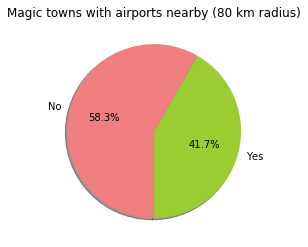

In [14]:
#Accesibility graph
Pie_data=(town_basic_data.groupby(["Airport Nearby"]))["Magic Town"].count()
plt.pie(Pie_data, autopct="%1.1f%%",labels=["Yes","No"], colors=["yellowgreen","lightcoral"], shadow=True, startangle=270)
plt.title("Magic towns with airports nearby (80 km radius)") 
plt.savefig('Outputs/Airportpie.png',bbox_inches='tight')
plt.show()

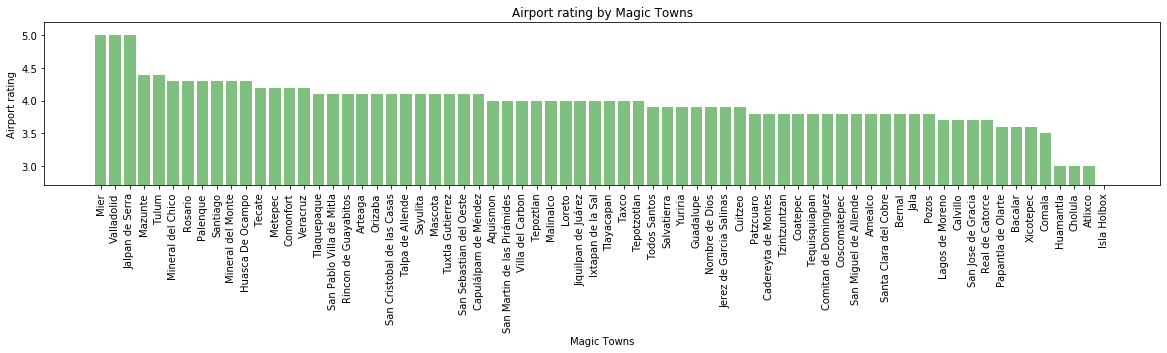

In [15]:
#Accesibility graph 2
Magic_towns=town_basic_data.loc[town_basic_data["Airport Nearby"]=="Yes"]["Magic Town"]
rating=town_basic_data.loc[town_basic_data["Airport Nearby"]=="Yes"]["Airport Rating"]
rating=np.array(rating,dtype=float)
Air_rate_df=pd.DataFrame({"Magic Towns":Magic_towns,
                         "Rating":rating})
Air_rate_df=Air_rate_df.sort_values(by="Rating", ascending=False)
plt.figure(figsize=(20,3))
plt.bar(Air_rate_df["Magic Towns"],Air_rate_df["Rating"], color='g', alpha=0.5, align="center")
plt.title("Airport rating by Magic Towns")
plt.xlabel("Magic Towns")
plt.ylabel("Airport rating")
plt.ylim(2.7,5.2)
plt.xticks(rotation='vertical')
plt.savefig('Outputs/Airportbar.png',bbox_inches='tight')
plt.show()

# Points of interest Analysis
The hoteles.com API provided data to colect landmarks or turistic points in each Magic Town

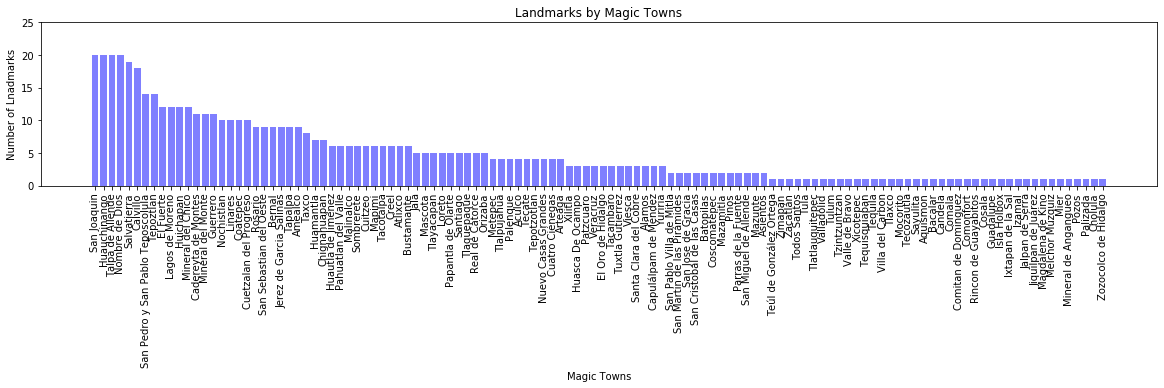

In [39]:
#Landmarks by town
Landmarks_bmt=(town_landmarks_data.groupby(["Destination Id"]))["Landmarks"].count()
Landmarks_bmt=np.array(Landmarks_bmt,dtype=float)
town_basic_data["Landmarks by Town"]=Landmarks_bmt
Landmarks_bt_df=town_basic_data.sort_values(by="Landmarks by Town", ascending=False)
x_axis=Landmarks_bt_df["Magic Town"]
y_axis=Landmarks_bt_df["Landmarks by Town"]
plt.figure(figsize=(20,3))
plt.bar(x_axis,y_axis, color='b', alpha=0.5, align="center")
plt.title("Landmarks by Magic Towns")
plt.xlabel("Magic Towns")
plt.ylabel("Number of Lnadmarks")
plt.ylim(0,25)
plt.xticks(rotation='vertical')
plt.savefig('Outputs/landmarks.png',bbox_inches='tight')
plt.show()

# Hotels number Correlation Analysis
As a mesure of how turisty is a magic town we deciden to look for correlations between this varible and the number of landmarks and the magic town location (latitude). We understand the limitations for this assumption.

In [40]:
Landmarks_bt_df
Hotels_bmt=(town_hotels_data.groupby(["Destination Id"]))["Hotel ID"].count()
Hotels_bmt=Hotels_bmt.reset_index()
Hot_lan_df=pd.merge(Hotels_bmt,Landmarks_bt_df)

In [41]:
Hot_lan_df

,Destination Id,Hotel ID,Magic Town,Latitude,Longitud,Airport Name,Airport Address,Airport Rating,Airport Nearby,Landmarks by Town
0,823818,16,San Pablo Villa de Mitla,16.922276,-96.345277,Oaxaca International Airport,,4.1,Yes,2.0
1,823872,57,Guadalupe,22.717236,-102.486971,Zacatecas International Airport,,3.9,Yes,1.0
2,825795,184,Malinalco,18.881918,-99.485642,Cuernavaca International Airport,,4,Yes,6.0
3,826278,2,Bustamante,26.547978,-100.508675,,,,No,6.0
4,826357,34,Cuetzalan del Progreso,20.027978,-97.500614,,,,No,10.0
...,...,...,...,...,...,...,...,...,...,...
91,11115168,4,San Pedro y San Pablo Teposcolula,17.507874,-97.506412,,,,No,14.0
92,11115632,25,Cuitzeo,19.980592,-101.111823,General Francisco Mujica International Airport,,3.9,Yes,6.0
93,11116012,1,Mineral del Chico,20.223041,-98.753556,Aeropuerto De Pachuca,,4.3,Yes,12.0
94,11116080,25,Comonfort,20.741269,-100.791119,Aeródromo de Celaya,,4.2,Yes,1.0


The r-squared is: 0.017510515224447333


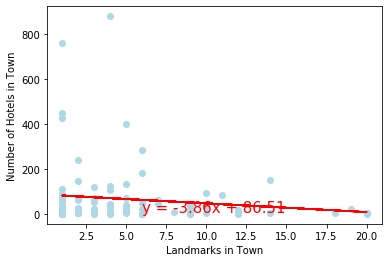

In [43]:
#Hotels and Landmarks relationship
y_values = Hot_lan_df['Hotel ID']
x_values = Hot_lan_df['Landmarks by Town']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="lightblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Landmarks in Town')
plt.ylabel('Number of Hotels in Town')
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.01680518470072911


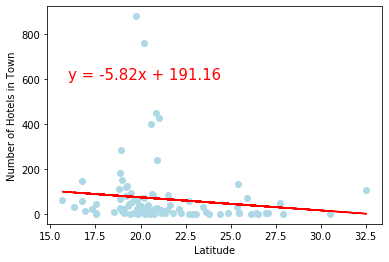

In [44]:
#Hotels and Latitud relationship
y_values = Hot_lan_df['Hotel ID']
x_values = Hot_lan_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="lightblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,600),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Number of Hotels in Town')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The IQR of Magic town Hotel ID: 60.0
Upper bound is 154.75


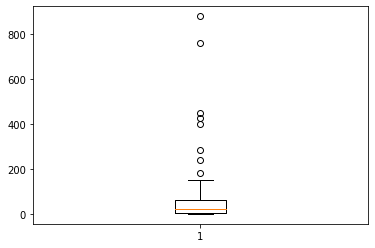

In [45]:
#Detecting outliers
quartiles=y_values.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
IQR=upperq-lowerq
lower_bound=lowerq-(1.5*IQR)
upper_bound=upperq+(1.5*IQR)
print(f"The IQR of Magic town Hotel ID: {IQR}")
print(f"Upper bound is {upper_bound}")
plt.boxplot(y_values)
plt.savefig('Outputs/outliers.png',bbox_inches='tight')
plt.show()

The r-squared is: 0.02873361210234132


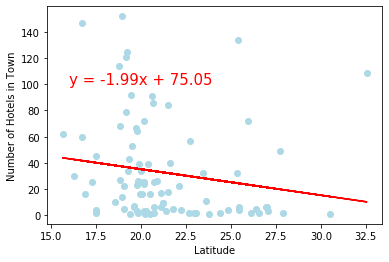

In [46]:
#Hotels and Latitud relationship whitout outliers
y_values = Hot_lan_df.loc[Hot_lan_df['Hotel ID']<154.75]['Hotel ID']
x_values = Hot_lan_df.loc[Hot_lan_df['Hotel ID']<154.75]['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="lightblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Number of Hotels in Town')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Outputs/latnohot.png',bbox_inches='tight')
plt.show()

In [50]:
#Posible Outliers
Outliers = Hot_lan_df.loc[Hot_lan_df['Hotel ID']>154.75]['Magic Town']
Outliers

2                 Malinalco
23              Tlaquepaque
35                  Atlixco
40              Tepotzotlan
60                    Tulum
69                 Sayulita
74    San Miguel de Allende
76     Rincon de Guayabitos
Name: Magic Town, dtype: object

The r-squared is: 0.008710462863315416


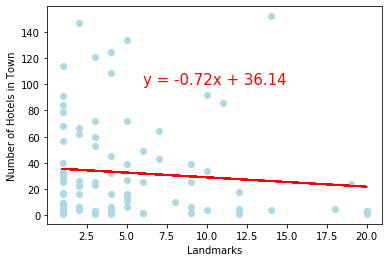

In [48]:
#Hotels and Landmarks relationship whitout outliers
y_values = Hot_lan_df.loc[Hot_lan_df['Hotel ID']<154.75]['Hotel ID']
x_values = Hot_lan_df.loc[Hot_lan_df['Hotel ID']<154.75]['Landmarks by Town']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="lightblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,100),fontsize=15,color="red")
plt.xlabel('Landmarks')
plt.ylabel('Number of Hotels in Town')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Outputs/landnohot.png',bbox_inches='tight')
plt.show()

# Magic Towns Map with details
In order to answer Where are the Magic Towns in Mexico? in a more visual format we decided to make a map showing the Maic Towns and their main characteristics (Name, Hotels number and landmarks)

In [62]:
#Where are the Magic Towns in Mexico?
#Creating labels
info_box_template = """
<dl>
<dt>Magic Town</dt><dd>{Magic Town}</dd>
<dt>Hotels Number</dt><dd>{Hotel ID}</dd>
<dt>Landmarks</dt><dd>{Landmarks by Town}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
MT_info = [info_box_template.format(**row) for index, row in Hot_lan_df.iterrows()]
locations = Hot_lan_df[["Latitude", "Longitud"]]

In [63]:
#Creating Maap and Layer
fig = gmaps.figure()
symbols = gmaps.symbol_layer(
        locations=locations, fill_color='red', stroke_color='red', info_box_content=MT_info)
fig.add_layer(symbols)
# Display figure
fig

AttributeError: 'Client' object has no attribute 'figure'

# Accomodation Analysis
This analysis was built to explore accomodation types and characteristics

In [82]:
#Merge Df by Destination ID to obtain Magic Town for each hotel
hotel_merge=pd.merge(town_basic_data,town_hotels_data, on="Destination Id",how="left")
hotel_merge.tail()

,Magic Town,Latitude,Longitud,Destination Id,Hotel Name,Hotel ID,Star rating,Locality,Guest Reviews,Guest Review Rating,Hotel type,Price per night,Rooms left
6508,Yuriria,20.183209,-101.225477,850818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6509,Zacatlán,19.964917,-97.999007,831864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6510,Zimapan,20.738095,-99.382114,832516,Hotel Antonio,1.456639e+09,2.5,Ixmiquilpan,1.0,8.0,Hotel,MXN 250,0.0
6511,Zimapan,20.738095,-99.382114,832516,Hotel Balneario Humedades,1.464572e+09,2.0,Ixmiquilpan,0.0,NaN,Hotel,MXN 307,4.0
6512,Zozocolco de Hidalgo,20.136328,-97.554787,11116120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#Group by Magic Town 
locality_group=hotel_merge.groupby(['Magic Town'])
hotel_count=pd.DataFrame(locality_group['Hotel ID'].count())
hotel_count.shape

(120, 1)

In [84]:
#Drop towns with no hotels
hotel_count_drop = hotel_count.loc[hotel_count['Hotel ID']>0]
hotel_count_drop.shape

(96, 1)

In [85]:
#Print Min and max amount of hotels per town
print(f"The minimum amount of hotels in a town is: {hotel_count_drop['Hotel ID'].min()}")
print(f"{hotel_count_drop['Hotel ID'].idxmax()} has the most hotels with {hotel_count_drop['Hotel ID'].max()}")

The minimum amount of hotels in a town is: 1
Tepotzotlan has the most hotels with 880


In [86]:
#Create bins and labels for plotting distribution table
# Create bins in which to place values based upon number of hotels
bins = [-1, 0, 9, 19, 29, 39,49,59,69,79,89,99,1000]

# Create labels for these bins
labels = ['0','1-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100+']

In [87]:
#Assign label to each count
hotel_count['Count Group']=pd.cut(hotel_count['Hotel ID'],bins,labels)
#Group by count group
count_group=hotel_count.groupby(['Count Group'])
#Get Frequency for each category
hotel_count_df=pd.DataFrame(count_group['Hotel ID'].count())
hotel_count_df

,Hotel ID
Count Group,
"(-1, 0]",24
"(0, 9]",36
"(9, 19]",9
"(19, 29]",11
"(29, 39]",7
"(39, 49]",4
"(49, 59]",2
"(59, 69]",5
"(69, 79]",3


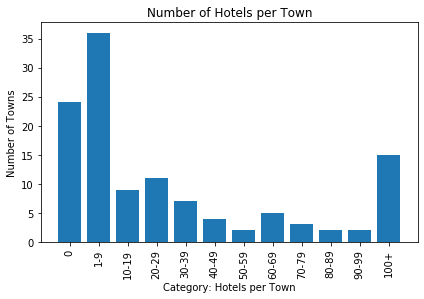

In [88]:
#Plot Hotels per Town
plt.bar(labels,hotel_count_df['Hotel ID'])
plt.xlabel('Category: Hotels per Town')
plt.ylabel('Number of Towns')
plt.title('Number of Hotels per Town')
plt.tight_layout()
plt.xticks(rotation="vertical")
plt.show()

In [89]:
#Get Average Star Rating to plot Average Rating for each town
hotel_count['Average Rating']=locality_group['Star rating'].mean()
hotel_count

,Hotel ID,Count Group,Average Rating
Magic Town,,,
Aculco,16,"(9, 19]",2.812500
Alamos,3,"(0, 9]",3.666667
Amealco,25,"(19, 29]",2.740000
Aquismon,40,"(39, 49]",2.562500
Arteaga,32,"(29, 39]",2.953125
...,...,...,...
Xilitla,3,"(0, 9]",2.666667
Yuriria,0,"(-1, 0]",NaN
Zacatlán,0,"(-1, 0]",NaN


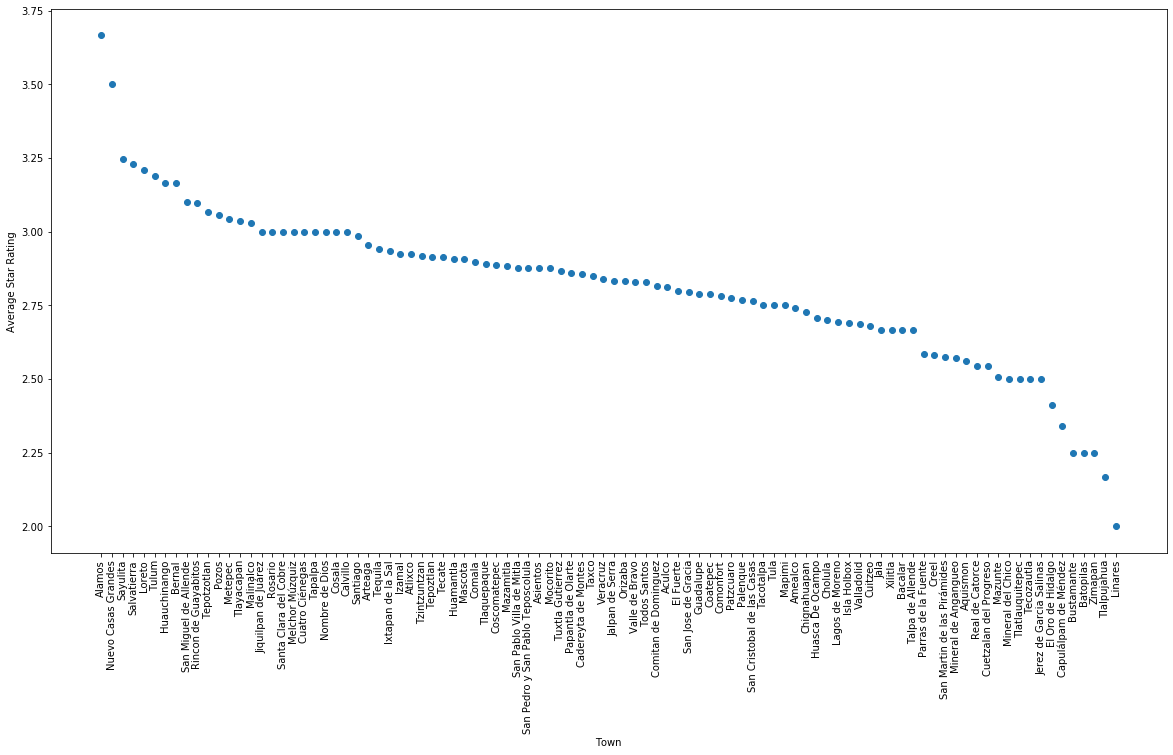

In [90]:
#Plot Average Star Rating for each town
hotel_dropna=hotel_count.dropna()
hotel_dropna=hotel_dropna.sort_values(by=['Average Rating'], ascending=False)
figure(figsize=(20,10))
x=list(hotel_dropna.index)
y=hotel_dropna['Average Rating']
plt.scatter(x,y)
plt.xticks(rotation="vertical")
plt.xlabel('Town')
plt.ylabel('Average Star Rating')
plt.show()

In [91]:
#filter to show only hotels with 4 star ratings and above
star_group=hotel_merge.loc[hotel_merge['Star rating'] > 3.9].groupby(['Magic Town'])
#Create Dynamic Table with number of hotels per town with 4 star ratings and above
hotels_4star=pd.DataFrame(star_group['Magic Town'].count())
#Include information of Average Ratings of hotels
hotels_4star['Average Rating']=star_group['Star rating'].mean()
hotels_4star.head(10)

,Magic Town,Average Rating
Magic Town,,
Alamos,1,4.000000
Amealco,2,4.000000
Arteaga,2,4.000000
Atlixco,29,4.155172
Bacalar,3,4.166667
Chignahuapan,1,4.000000
Coatepec,2,4.000000
Comala,2,4.500000
Guadalupe,4,4.000000


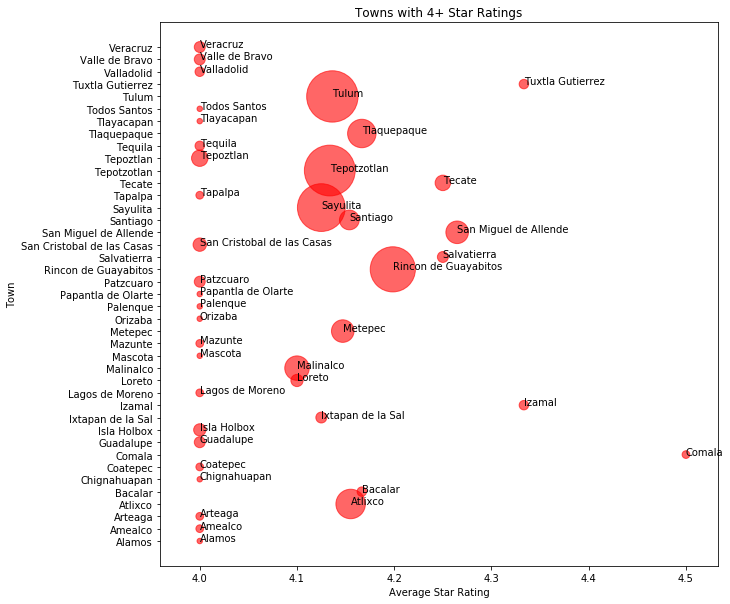

In [34]:
#plot Average Rating for each town with number of hotels as size on a bubble chart
y=list(hotels_4star.index)
s=hotels_4star['Magic Town']
x=hotels_4star['Average Rating']
N=100
colors=np.random.rand(N)
figure(figsize=(10,10))
for i,type in enumerate(y):
    z = x[i]
    w = y[i]
    plt.text(z,w,type,fontsize=10)
plt.scatter(x,y,s*30,alpha = 0.6,c='red')
plt.ylabel('Town')
plt.xlabel('Average Star Rating')
plt.title('Towns with 4+ Star Ratings')
plt.show()

In [92]:
town_hotels_data = town_hotels_data.merge(town_basic_data)
town_hotels_data

,Destination Id,Hotel Name,Hotel ID,Star rating,Locality,Guest Reviews,Guest Review Rating,Hotel type,Price per night,Rooms left,Magic Town,Latitude,Longitud
0,1904726,Collection O Xani Mui Hotel Boutique,572330,2.5,Aculco,0,NaN,Hotel,MXN 533,1,Aculco,20.089649,-99.759271
1,1904726,Hotel Aculco,1623938048,2.5,Aculco,0,NaN,Hotel,"MXN 1,652",0,Aculco,20.089649,-99.759271
2,1904726,Hotel La Esperanza,572268,2.5,Aculco,0,NaN,Hotel,0,0,Aculco,20.089649,-99.759271
3,1904726,HOH Hotel,643875040,3.5,Aculco,11,7.6,Hotel,0,0,Aculco,20.089649,-99.759271
4,1904726,Mision La Muralla,236511,2.5,Amealco,149,8.8,Hotel,0,0,Aculco,20.089649,-99.759271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6484,847236,Hotel Paraíso Huasteco,487172,2.5,Tamazunchale,12,6.4,Hotel,0,0,Xilitla,21.386644,-98.981200
6485,847236,Sierra Huasteca Tamazunchale,570859,2.5,Tamazunchale,12,8.6,Hotel,0,0,Xilitla,21.386644,-98.981200
6486,847236,HI Huasteca Inn Hotel,1424871936,3.0,Matlapa,3,7.4,Hotel,0,0,Xilitla,21.386644,-98.981200
6487,832516,Hotel Antonio,1456639264,2.5,Ixmiquilpan,1,8.0,Hotel,MXN 250,0,Zimapan,20.738095,-99.382114


In [93]:
#Get Hotel Prices
hotel_merge.dropna(subset=['Price per night'],inplace=True)
hotel_merge

,Magic Town,Latitude,Longitud,Destination Id,Hotel Name,Hotel ID,Star rating,Locality,Guest Reviews,Guest Review Rating,Hotel type,Price per night,Rooms left
0,Aculco,20.089649,-99.759271,1904726,Collection O Xani Mui Hotel Boutique,5.723300e+05,2.5,Aculco,0.0,NaN,Hotel,MXN 533,1.0
1,Aculco,20.089649,-99.759271,1904726,Hotel Aculco,1.623938e+09,2.5,Aculco,0.0,NaN,Hotel,"MXN 1,652",0.0
2,Aculco,20.089649,-99.759271,1904726,Hotel La Esperanza,5.722680e+05,2.5,Aculco,0.0,NaN,Hotel,0,0.0
3,Aculco,20.089649,-99.759271,1904726,HOH Hotel,6.438750e+08,3.5,Aculco,11.0,7.6,Hotel,0,0.0
4,Aculco,20.089649,-99.759271,1904726,Mision La Muralla,2.365110e+05,2.5,Amealco,149.0,8.8,Hotel,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6505,Xilitla,21.386644,-98.981200,847236,Hotel Paraíso Huasteco,4.871720e+05,2.5,Tamazunchale,12.0,6.4,Hotel,0,0.0
6506,Xilitla,21.386644,-98.981200,847236,Sierra Huasteca Tamazunchale,5.708590e+05,2.5,Tamazunchale,12.0,8.6,Hotel,0,0.0
6507,Xilitla,21.386644,-98.981200,847236,HI Huasteca Inn Hotel,1.424872e+09,3.0,Matlapa,3.0,7.4,Hotel,0,0.0
6510,Zimapan,20.738095,-99.382114,832516,Hotel Antonio,1.456639e+09,2.5,Ixmiquilpan,1.0,8.0,Hotel,MXN 250,0.0


In [94]:
hotel_merge['Price per night']=hotel_merge['Price per night'].map(lambda x: x.lstrip('MXN'))
hotel_merge['Price per night']=hotel_merge['Price per night'].replace(',','',regex=True).astype(float)

In [95]:
hotel_prices=hotel_merge.loc[hotel_merge['Star rating']>3.9]
hotel_prices.shape

(535, 13)

In [96]:
hotel_prices=hotel_prices.loc[hotel_prices['Price per night']>0]
hotel_prices.shape

(72, 13)

In [97]:
hotel_prices=hotel_prices.loc[hotel_prices['Hotel type']=='Hotel']
hotel_prices.shape

(62, 13)

In [98]:
#Group by Magic Town 
locality_group2=hotel_prices.groupby(['Magic Town'])
hotel_prices_summary=pd.DataFrame(locality_group2['Price per night'].mean())
hotel_prices_summary

,Price per night
Magic Town,
Alamos,3419.000000
Atlixco,1588.000000
Bacalar,4296.000000
Isla Holbox,3651.750000
Ixtapan de la Sal,4232.000000
Lagos de Moreno,2580.000000
Loreto,4612.000000
Mazunte,9245.000000
Patzcuaro,884.000000


In [99]:
hotel_merge=hotel_merge.loc[hotel_merge['Price per night']>0]
hotel_2mean=hotel_merge.loc[hotel_merge['Star rating']<=2]['Price per night'].mean()
hotel_2max=hotel_merge.loc[hotel_merge['Star rating']<=2]['Price per night'].max()
hotel_2min=hotel_merge.loc[hotel_merge['Star rating']<=2]['Price per night'].min()

hotel_3mean=hotel_merge.loc[(hotel_merge['Star rating']>2) & (hotel_merge['Star rating']<=3)]['Price per night'].mean()
hotel_3max=hotel_merge.loc[(hotel_merge['Star rating']>2) & (hotel_merge['Star rating']<=3)]['Price per night'].max()
hotel_3min=hotel_merge.loc[(hotel_merge['Star rating']>2) & (hotel_merge['Star rating']<=3)]['Price per night'].min()

hotel_4mean=hotel_merge.loc[(hotel_merge['Star rating']>3) & (hotel_merge['Star rating']<=4)]['Price per night'].mean()
hotel_4max=hotel_merge.loc[(hotel_merge['Star rating']>3) & (hotel_merge['Star rating']<=4)]['Price per night'].max()
hotel_4min=hotel_merge.loc[(hotel_merge['Star rating']>3) & (hotel_merge['Star rating']<=4)]['Price per night'].min()

hotel_5mean=hotel_merge.loc[(hotel_merge['Star rating']>4) & (hotel_merge['Star rating']<=5)]['Price per night'].mean()
hotel_5max=hotel_merge.loc[(hotel_merge['Star rating']>4) & (hotel_merge['Star rating']<=5)]['Price per night'].max()
hotel_5min=hotel_merge.loc[(hotel_merge['Star rating']>4) & (hotel_merge['Star rating']<=5)]['Price per night'].min()

In [100]:
hotel_2min="${:,.2f}".format(hotel_2min)
hotel_2max="${:,.2f}".format(hotel_2max)
hotel_2mean="${:,.2f}".format(hotel_2mean)

hotel_3min="${:,.2f}".format(hotel_3min)
hotel_3max="${:,.2f}".format(hotel_3max)
hotel_3mean="${:,.2f}".format(hotel_3mean)

hotel_4min="${:,.2f}".format(hotel_4min)
hotel_4max="${:,.2f}".format(hotel_4max)
hotel_4mean="${:,.2f}".format(hotel_4mean)

hotel_5min="${:,.2f}".format(hotel_5min)
hotel_5max="${:,.2f}".format(hotel_5max)
hotel_5mean="${:,.2f}".format(hotel_5mean)

summary_dicitonary= {"":['2 Stars and below','Between 2 and 3','Between 3 and 4','Between 4 and 5'],
                    "Min":[hotel_2min,hotel_3min,hotel_4min,hotel_5min],
                    "Max":[hotel_2max,hotel_3max,hotel_4max,hotel_5max],
                    "Mean":[hotel_2mean,hotel_3mean,hotel_4mean,hotel_5mean]}

accommodation_summary=pd.DataFrame(summary_dicitonary)
accommodation_summary

,,Min,Max,Mean
0,2 Stars and below,$119.00,"$23,651.00","$1,085.19"
1,Between 2 and 3,$173.00,"$14,000.00","$1,051.03"
2,Between 3 and 4,$417.00,"$71,581.00","$3,012.96"
3,Between 4 and 5,$839.00,"$12,040.00","$5,998.46"


In [20]:
# Analyzing type_hotel column  
town_hotels_data["Hotel type"].value_counts()

Hotel              3926
Apartment           734
Home                323
Apartments          228
Guest house         219
Hostel              179
Condo               179
Aparthotel          141
Cabins              103
Villa                97
All inclusive        87
Hostal               79
Condos               46
Villas               39
Homes                36
Motel                23
Cabin                12
Ranch                 7
Cottage               7
Campsite              4
Town house            4
Cottages              3
Chalets               2
Country house         2
Residences            2
Safari/Tentalow       2
Treehouse             2
Castle                1
Residence             1
Chalet                1
Name: Hotel type, dtype: int64

In [21]:
#Replacing similar hotel_type to clean data 
town_hotels_data["Hotel type"]=town_hotels_data["Hotel type"].replace({"Apartments":"Apartment","Hostal":"Hostel","Villas":"Villa"})
town_hotels_data["Hotel type"]=town_hotels_data["Hotel type"].replace({"All inclusive":"Hotel","Homes":"Home","Cabins":"Cabin"})
town_hotels_data["Hotel type"]=town_hotels_data["Hotel type"].replace({"Cottages":"Cottage","Chalets":"Chalet","Residences":"Home"})
town_hotels_data["Hotel type"]=town_hotels_data["Hotel type"].replace({"Town house":"Home","Country house":"Ranch","Residence":"Home"})
town_hotels_data["Hotel type"]=town_hotels_data["Hotel type"].replace({"Condos":"Condo"})
town_hotels_data["Hotel type"].value_counts()

Hotel              4013
Apartment           962
Home                366
Hostel              258
Condo               225
Guest house         219
Aparthotel          141
Villa               136
Cabin               115
Motel                23
Cottage              10
Ranch                 9
Campsite              4
Chalet                3
Safari/Tentalow       2
Treehouse             2
Castle                1
Name: Hotel type, dtype: int64

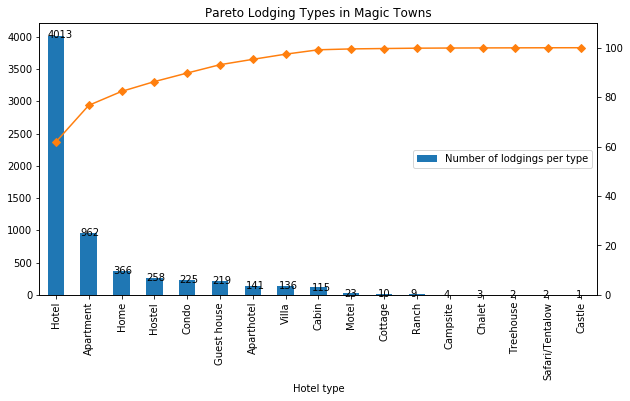

In [22]:
group_by_HotelType = town_hotels_data.groupby(["Hotel type"]).count()
group_by_HotelType_sorted = group_by_HotelType['Destination Id'].sort_values(ascending=False)

df = pd.DataFrame(group_by_HotelType_sorted)
#ax = df.plot.bar(alpha=0.75)
df['pareto'] = 100 *df['Destination Id'].cumsum() / df['Destination Id'].sum()
fig, axes = plt.subplots()
ax1 = df.plot(use_index=True, y='Destination Id',  kind='bar', ax=axes,figsize=(10,5))
ax2 =df.plot(use_index=True, y='pareto', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
ax2.set_ylim([0,110])
#plt.ylabel("Number of lodgings")
plt.title('Pareto Lodging Types in Magic Towns')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
#plt.figure(figsize=(100,15))
ax1.legend(["Number of lodgings per type"],loc='center right')

for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),verticalalignment='center')
plt.savefig('Outputs/pareto_accommodations.png',bbox_inches='tight')
plt.show()


List of magic Towns:
Aculco,   Alamos,   Amealco,   Aquismon,   Arteaga
Atlixco,   Bacalar,   Batopilas,   Bustamante,   Cadereyta de Montes
Calvillo,   Candela,   Capulálpam de Méndez,   Nuevo Casas Grandes,   Tuxtla Gutierrez
Chignahuapan,   Coatepec,   Comala,   Comitan de Dominguez,   Comonfort
Rincon de Guayabitos,   Cosala,   Coscomatepec,   Creel,   Cuatro Ciénegas
Cuetzalan del Progreso,   Cuitzeo,   San Miguel de Allende,   El Oro de Hidalgo,   Rosario
El Fuerte,   Guadalupe,   Guerrero,   Huamantla,   Huasca De Ocampo
Huauchinango,   Huautla de Jiménez,   Huichapan,   Isla Holbox,   Ixtapan de la Sal
Izamal,   Jala,   Jalpan de Serra,   Jerez de Garcia Salinas,   Jiquilpan de Juárez
Lagos de Moreno,   Linares,   Loreto,   Magdalena de Kino,   Malinalco
Mapimi,   Mascota,   Mazamitla,   Mazunte,   Melchor Múzquiz
Metepec,   Mier,   Mineral de Angangueo,   Pozos,   Mineral del Chico
Mocorito,   Nombre de Dios,   Nochistlan,   Orizaba,   Pahuatlan del Valle
Palenque,   Palizada,

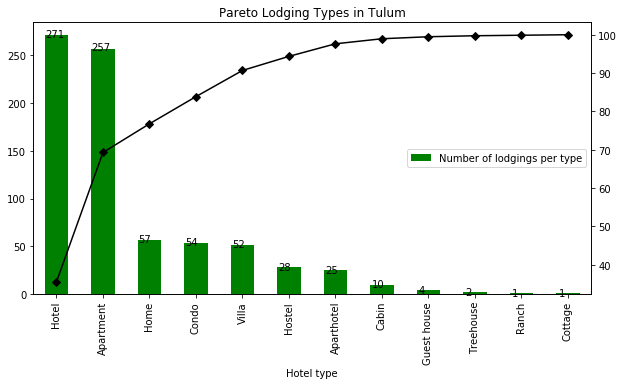

In [58]:
magic_town_list = town_basic_data['Magic Town']
magic_town_list.to_string(index=False).replace("\n",",")
print('List of magic Towns:')

counter = 1
towns = ""
for town in magic_town_list:
    if counter%5==0:
        towns += town + "\n"
    else:
        towns += town + ",   "
    counter += 1

print(towns)
print('-----------------------------------------------')

magic_town_search = input('Pick one magic town to see what type of loadging they offer: ')

town_hotels_data_search = town_hotels_data.loc[town_hotels_data['Magic Town']==magic_town_search]
group_by_HotelType = town_hotels_data_search.groupby(["Hotel type"]).count()
group_by_HotelType_sorted = group_by_HotelType['Destination Id'].sort_values(ascending=False)

df = pd.DataFrame(group_by_HotelType_sorted)
#ax = df.plot.bar(alpha=0.75)
df['pareto'] = 100 *df['Destination Id'].cumsum() / df['Destination Id'].sum()
fig, axes = plt.subplots()
ax1 = df.plot(use_index=True, y='Destination Id',  kind='bar', ax=axes,figsize=(10,5),color='green')
ax2 =df.plot(use_index=True, y='pareto', marker='D', color="black", kind='line', ax=axes, secondary_y=True)
#ax2.set_ylim([0,110])
#plt.ylabel("Number of lodgings")
plt.title(f'Pareto Lodging Types in {magic_town_search}')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
#plt.figure(figsize=(100,15))
ax1.legend(["Number of lodgings per type"],loc='center right')

for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),verticalalignment='center')
plt.savefig('Outputs/pareto_out2.png',bbox_inches='tight')
plt.show()

# Distance from Major Cities Analysis
Another interesting variable for local tourists is how close is it from major cities. For this analysis a Google distance matrix was used.

In [16]:
# Import cities file as DataFrame
cities_pd = pd.read_csv("Resources/pueblos_magicos.csv")
cities_pd = cities_pd.rename(columns={"Ciudad_Estado ": "Ciudad y Estado"})
cities_pd.head()

# we realized google maps was more precise if we added state -Not only did it process all recods this time record searches were more precise
# so we search by Ciudad y Estado column
cities_pd

,Ciudad,Estado,Ciudad y Estado
0,Aculco,Estado de Mexico,"Aculco, Estado de Mexico"
1,Alamos,Sonora,"Alamos, Sonora"
2,Amealco,Queretaro,"Amealco, Queretaro"
3,Aquismon,San Luis Potosi,"Aquismon, San Luis Potosi"
4,Arteaga,Coahuila,"Arteaga, Coahuila"
...,...,...,...
116,Xilitla,San Luis Potosi,"Xilitla, San Luis Potosi"
117,Yuriria,Guanajuato,"Yuriria, Guanajuato"
118,Zacatlan,Puebla,"Zacatlan, Puebla"
119,Zimapan,Hidalgo,"Zimapan, Hidalgo"


In [17]:
#Create a List of cities with State to look on Google map
ciudad_pd=cities_pd['Ciudad y Estado']
ciudad_pd

0             Aculco, Estado de Mexico
1                      Alamos,  Sonora
2                   Amealco, Queretaro
3           Aquismon,  San Luis Potosi
4                   Arteaga,  Coahuila
                    ...               
116           Xilitla, San Luis Potosi
117               Yuriria,  Guanajuato
118                  Zacatlan,  Puebla
119                  Zimapan,  Hidalgo
120    Zozocolco de Hidalgo,  Veracruz
Name: Ciudad y Estado, Length: 121, dtype: object

In [18]:
# Requires API key using gmaps, we also enables gmaps.distancematrix api that helps us calculate distance beween two points and duration
gmaps = googlemaps.Client(key=gkey_google) 
# Requires cities names to try the api before running it 
my_dist = gmaps.distance_matrix('Monterrey','Santiago,Nuevo Leon')['rows'][0]['elements'][0] 
  
# Printing the result 
print(my_dist) 

{'distance': {'text': '37.8 km', 'value': 37840}, 'duration': {'text': '41 mins', 'value': 2484}, 'status': 'OK'}


In [23]:
#Calculate distance from Monterrey to every Magic Town
distance= []
duration= []
currentcity=[]
origin=[]

for ciudad in ciudad_pd:
    
  
    current_city = ciudad

    # Requires API key 
    gmaps = googlemaps.Client(key=gkey_google) 
    # Requires cities name 
    my_dist = gmaps.distance_matrix('Monterrey',current_city)['rows'][0]['elements'][0] 
    # Get weather data responses 
    
    try:
        distance.append(my_dist['distance']['text'])
        duration.append(my_dist['duration']['text'])
        currentcity.append(current_city)
        origin.append("Monterrey")
        print(f'Processing Record  {current_city}')
    except:
        print(f'City not found. Skipping... {current_city}')

Processing Record  Aculco, Estado de Mexico
Processing Record  Alamos,  Sonora
Processing Record  Amealco, Queretaro
Processing Record  Aquismon,  San Luis Potosi
Processing Record  Arteaga,  Coahuila
Processing Record  Atlixco,  Puebla
Processing Record  Bacalar,  Quintana Roo
Processing Record  Batopilas,  Chihuahua
Processing Record  Bustamante,  Nuevo Leon
Processing Record  Cadereyta de Montes, Queretaro
Processing Record  Calvillo,  Aguascalientes
Processing Record  Candela,  Coahuila
Processing Record  Capulalpam de Mendez,  Oaxaca
Processing Record  Casas Grandes,  Chihuahua
Processing Record  Chiapa de Corzo,  Chiapas
Processing Record  Chignahuapan,  Puebla
Processing Record  Coatepec,  Veracruz
Processing Record  Comala,  Colima
Processing Record  Comitan,  Chiapas
Processing Record  Comonfort,  Guanajuato
Processing Record  Compostela,  Nayarit
Processing Record  Cosala,  Sinaloa
Processing Record  Coscomatepec,  Veracruz
Processing Record  Creel,  Chihuahua
Processing Reco

In [24]:
#Calculate distance from Mexico City to every Magic Town
distancedf= []
durationdf= []
currentcitydf=[]
origindf=[]

for ciudad in ciudad_pd:
  
    current_city = ciudad

    # Requires API key 
    gmaps = googlemaps.Client(key=gkey_google) 
    # Requires cities name 
    my_dist = gmaps.distance_matrix('Ciudad de Mexico',current_city)['rows'][0]['elements'][0] 
    # Get weather data responses 
    
    try:
        distancedf.append(my_dist['distance']['text'])
        durationdf.append(my_dist['duration']['text'])
        currentcitydf.append(current_city)
        origindf.append("Ciudad de Mexico")
        print(f'Processing Record  {current_city}')
    except:
        print(f'City not found. Skipping... {current_city}')

Processing Record  Aculco, Estado de Mexico
Processing Record  Alamos,  Sonora
Processing Record  Amealco, Queretaro
Processing Record  Aquismon,  San Luis Potosi
Processing Record  Arteaga,  Coahuila
Processing Record  Atlixco,  Puebla
Processing Record  Bacalar,  Quintana Roo
Processing Record  Batopilas,  Chihuahua
Processing Record  Bustamante,  Nuevo Leon
Processing Record  Cadereyta de Montes, Queretaro
Processing Record  Calvillo,  Aguascalientes
Processing Record  Candela,  Coahuila
Processing Record  Capulalpam de Mendez,  Oaxaca
Processing Record  Casas Grandes,  Chihuahua
Processing Record  Chiapa de Corzo,  Chiapas
Processing Record  Chignahuapan,  Puebla
Processing Record  Coatepec,  Veracruz
Processing Record  Comala,  Colima
Processing Record  Comitan,  Chiapas
Processing Record  Comonfort,  Guanajuato
Processing Record  Compostela,  Nayarit
Processing Record  Cosala,  Sinaloa
Processing Record  Coscomatepec,  Veracruz
Processing Record  Creel,  Chihuahua
Processing Reco

In [25]:
#Calculate distance from Guadalajara to every Magic Town
distancegd= []
durationgd= []
currentcitygd=[]
origingd=[]

for ciudad in ciudad_pd:
  
    current_city = ciudad

    # Requires API key 
    gmaps = googlemaps.Client(key=gkey_google) 
    # Requires cities name 
    my_dist = gmaps.distance_matrix('Guadalajara',current_city)['rows'][0]['elements'][0] 
    # Get weather data responses 
    
    try:
        distancegd.append(my_dist['distance']['text'])
        durationgd.append(my_dist['duration']['text'])
        currentcitygd.append(current_city)
        origingd.append("Guadalajara")
        print(f'Processing Record  {current_city}')
    except:
        print(f'City not found. Skipping... {current_city}')

Processing Record  Aculco, Estado de Mexico
Processing Record  Alamos,  Sonora
Processing Record  Amealco, Queretaro
Processing Record  Aquismon,  San Luis Potosi
Processing Record  Arteaga,  Coahuila
Processing Record  Atlixco,  Puebla
Processing Record  Bacalar,  Quintana Roo
Processing Record  Batopilas,  Chihuahua
Processing Record  Bustamante,  Nuevo Leon
Processing Record  Cadereyta de Montes, Queretaro
Processing Record  Calvillo,  Aguascalientes
Processing Record  Candela,  Coahuila
Processing Record  Capulalpam de Mendez,  Oaxaca
Processing Record  Casas Grandes,  Chihuahua
Processing Record  Chiapa de Corzo,  Chiapas
Processing Record  Chignahuapan,  Puebla
Processing Record  Coatepec,  Veracruz
Processing Record  Comala,  Colima
Processing Record  Comitan,  Chiapas
Processing Record  Comonfort,  Guanajuato
Processing Record  Compostela,  Nayarit
Processing Record  Cosala,  Sinaloa
Processing Record  Coscomatepec,  Veracruz
Processing Record  Creel,  Chihuahua
Processing Reco

In [26]:
# Final DataFrame for Monterrey
monterrey_df = pd.DataFrame({"Ciudad Origen":origin, "Ciudad y Estado":currentcity, "Distance":distance, "Duration":duration})
monterrey_df

,Ciudad Origen,Ciudad y Estado,Distance,Duration
0,Monterrey,"Aculco, Estado de Mexico",789 km,8 hours 50 mins
1,Monterrey,"Alamos, Sonora","1,411 km",16 hours 18 mins
2,Monterrey,"Amealco, Queretaro",770 km,8 hours 42 mins
3,Monterrey,"Aquismon, San Luis Potosi",568 km,7 hours 23 mins
4,Monterrey,"Arteaga, Coahuila",88.7 km,1 hour 21 mins
...,...,...,...,...
116,Monterrey,"Xilitla, San Luis Potosi",604 km,8 hours 9 mins
117,Monterrey,"Yuriria, Guanajuato",777 km,8 hours 50 mins
118,Monterrey,"Zacatlan, Puebla",857 km,11 hours 1 min
119,Monterrey,"Zimapan, Hidalgo",841 km,10 hours 6 mins


In [27]:
# Final DataFrame for Mexico City
mexico_df = pd.DataFrame({"Ciudad Origen":origindf, "Ciudad y Estado":currentcitydf, "Distance":distancedf, "Duration":durationdf})
mexico_df

,Ciudad Origen,Ciudad y Estado,Distance,Duration
0,Ciudad de Mexico,"Aculco, Estado de Mexico",135 km,1 hour 56 mins
1,Ciudad de Mexico,"Alamos, Sonora","1,607 km",18 hours 21 mins
2,Ciudad de Mexico,"Amealco, Queretaro",182 km,2 hours 18 mins
3,Ciudad de Mexico,"Aquismon, San Luis Potosi",492 km,7 hours 40 mins
4,Ciudad de Mexico,"Arteaga, Coahuila",830 km,9 hours 14 mins
...,...,...,...,...
116,Ciudad de Mexico,"Xilitla, San Luis Potosi",450 km,6 hours 49 mins
117,Ciudad de Mexico,"Yuriria, Guanajuato",327 km,3 hours 50 mins
118,Ciudad de Mexico,"Zacatlan, Puebla",191 km,2 hours 41 mins
119,Ciudad de Mexico,"Zimapan, Hidalgo",205 km,3 hours 25 mins


In [28]:
# Final DataFrames for Guadalajara
guad_df = pd.DataFrame({"Ciudad Origen":origingd, "Ciudad y Estado":currentcitygd, "Distance":distancegd, "Duration":durationgd})
guad_df

,Ciudad Origen,Ciudad y Estado,Distance,Duration
0,Guadalajara,"Aculco, Estado de Mexico",443 km,4 hours 53 mins
1,Guadalajara,"Alamos, Sonora","1,062 km",12 hours 36 mins
2,Guadalajara,"Amealco, Queretaro",420 km,4 hours 52 mins
3,Guadalajara,"Aquismon, San Luis Potosi",667 km,7 hours 44 mins
4,Guadalajara,"Arteaga, Coahuila",716 km,8 hours 22 mins
...,...,...,...,...
116,Guadalajara,"Xilitla, San Luis Potosi",703 km,8 hours 29 mins
117,Guadalajara,"Yuriria, Guanajuato",303 km,3 hours 21 mins
118,Guadalajara,"Zacatlan, Puebla",675 km,7 hours 28 mins
119,Guadalajara,"Zimapan, Hidalgo",504 km,6 hours 26 mins


In [29]:
#For Datacleaning we had to convert distance to a float type number
monterrey_df['Distance(kms)']= monterrey_df['Distance'].str.replace(' km', '')
monterrey_df['Distance(kms)']= pd.to_numeric(monterrey_df['Distance(kms)'],errors='coerce')
#monterrey_df['Type'] = monterrey_df['Distance(kms)'].apply(lambda x: type(x).__name__)
monterrey_df

,Ciudad Origen,Ciudad y Estado,Distance,Duration,Distance(kms)
0,Monterrey,"Aculco, Estado de Mexico",789 km,8 hours 50 mins,789.0
1,Monterrey,"Alamos, Sonora","1,411 km",16 hours 18 mins,NaN
2,Monterrey,"Amealco, Queretaro",770 km,8 hours 42 mins,770.0
3,Monterrey,"Aquismon, San Luis Potosi",568 km,7 hours 23 mins,568.0
4,Monterrey,"Arteaga, Coahuila",88.7 km,1 hour 21 mins,88.7
...,...,...,...,...,...
116,Monterrey,"Xilitla, San Luis Potosi",604 km,8 hours 9 mins,604.0
117,Monterrey,"Yuriria, Guanajuato",777 km,8 hours 50 mins,777.0
118,Monterrey,"Zacatlan, Puebla",857 km,11 hours 1 min,857.0
119,Monterrey,"Zimapan, Hidalgo",841 km,10 hours 6 mins,841.0


In [30]:
#For Datacleaning we had to convert distance to a float type number
guad_df['Distance(kms)']= guad_df['Distance'].str.replace(' km', '')
guad_df['Distance(kms)']= pd.to_numeric(guad_df['Distance(kms)'],errors='coerce')
#guad_df['Type'] = guad_df['Distance(kms)'].apply(lambda x: type(x).__name__)
guad_df

,Ciudad Origen,Ciudad y Estado,Distance,Duration,Distance(kms)
0,Guadalajara,"Aculco, Estado de Mexico",443 km,4 hours 53 mins,443.0
1,Guadalajara,"Alamos, Sonora","1,062 km",12 hours 36 mins,NaN
2,Guadalajara,"Amealco, Queretaro",420 km,4 hours 52 mins,420.0
3,Guadalajara,"Aquismon, San Luis Potosi",667 km,7 hours 44 mins,667.0
4,Guadalajara,"Arteaga, Coahuila",716 km,8 hours 22 mins,716.0
...,...,...,...,...,...
116,Guadalajara,"Xilitla, San Luis Potosi",703 km,8 hours 29 mins,703.0
117,Guadalajara,"Yuriria, Guanajuato",303 km,3 hours 21 mins,303.0
118,Guadalajara,"Zacatlan, Puebla",675 km,7 hours 28 mins,675.0
119,Guadalajara,"Zimapan, Hidalgo",504 km,6 hours 26 mins,504.0


In [31]:
#For Datacleaning we had to convert distance to a float type number
mexico_df['Distance(kms)']= mexico_df['Distance'].str.replace(' km', '')
mexico_df['Distance(kms)']= pd.to_numeric(mexico_df['Distance(kms)'],errors='coerce')
#mexico_df['Type'] = mexico_df['Distance(kms)'].apply(lambda x: type(x).__name__)
mexico_df

,Ciudad Origen,Ciudad y Estado,Distance,Duration,Distance(kms)
0,Ciudad de Mexico,"Aculco, Estado de Mexico",135 km,1 hour 56 mins,135.0
1,Ciudad de Mexico,"Alamos, Sonora","1,607 km",18 hours 21 mins,NaN
2,Ciudad de Mexico,"Amealco, Queretaro",182 km,2 hours 18 mins,182.0
3,Ciudad de Mexico,"Aquismon, San Luis Potosi",492 km,7 hours 40 mins,492.0
4,Ciudad de Mexico,"Arteaga, Coahuila",830 km,9 hours 14 mins,830.0
...,...,...,...,...,...
116,Ciudad de Mexico,"Xilitla, San Luis Potosi",450 km,6 hours 49 mins,450.0
117,Ciudad de Mexico,"Yuriria, Guanajuato",327 km,3 hours 50 mins,327.0
118,Ciudad de Mexico,"Zacatlan, Puebla",191 km,2 hours 41 mins,191.0
119,Ciudad de Mexico,"Zimapan, Hidalgo",205 km,3 hours 25 mins,205.0


In [32]:
#Reduce Dataframe to magictowns closer to 300 kms from Monterrey and sort in descending order
close_monterrey=monterrey_df[monterrey_df["Distance(kms)"] <300]
close_monterrey=close_monterrey.sort_values("Distance(kms)")
close_monterrey

,Ciudad Origen,Ciudad y Estado,Distance,Duration,Distance(kms)
87,Monterrey,"Santiago, Nuevo Leon",37.8 km,41 mins,37.8
4,Monterrey,"Arteaga, Coahuila",88.7 km,1 hour 21 mins,88.7
8,Monterrey,"Bustamante, Nuevo Leon",108 km,1 hour 36 mins,108.0
47,Monterrey,"Linares, Nuevo Leon",130 km,1 hour 46 mins,130.0
11,Monterrey,"Candela, Coahuila",153 km,2 hours 2 mins,153.0
57,Monterrey,"Mier, Tamaulipas",156 km,1 hour 54 mins,156.0
69,Monterrey,"Parras de la Fuente, Coahuila",228 km,2 hours 48 mins,228.0
24,Monterrey,"Cuatro Cienegas, Coahuila",275 km,3 hours 32 mins,275.0


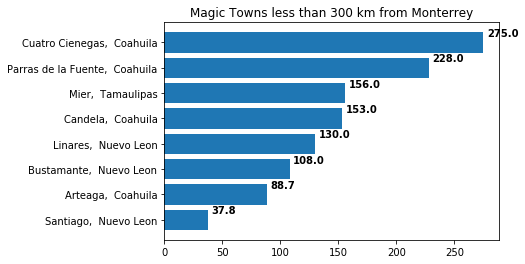

In [33]:
# Make fake dataset for plotting
height = close_monterrey["Distance(kms)"]
bars = close_monterrey["Ciudad y Estado"]
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)


for i, v in enumerate(height):
    plt.text(v + 3, i + .25, str(v), color='black', fontweight='bold')


# Show graphic
plt.title("Magic Towns less than 300 km from Monterrey")
plt.savefig('Outputs/Distancemty.png',bbox_inches='tight')
plt.show()


In [34]:
#Reduce Dataframe to magictowns closer to 150 kms from Mexico City and sort in descending order
close_mexico=mexico_df[mexico_df["Distance(kms)"] <150]
close_mexico=close_mexico.sort_values("Distance(kms)")
close_mexico

,Ciudad Origen,Ciudad y Estado,Distance,Duration,Distance(kms)
97,Ciudad de Mexico,"Tepotzotlan, Estado de Mexico",38.2 km,52 mins,38.2
79,Ciudad de Mexico,"San Martin de las Piramides, Estado de Mexico",54.8 km,58 mins,54.8
56,Ciudad de Mexico,"Metepec, Estado de Mexico",62.7 km,1 hour 10 mins,62.7
113,Ciudad de Mexico,"Villa del carbon, Estado de Mexico",69.4 km,1 hour 47 mins,69.4
98,Ciudad de Mexico,"Tepoztlan, Morelos",82.8 km,1 hour 25 mins,82.8
50,Ciudad de Mexico,"Malinalco, Estado de Mexico",97.0 km,2 hours 6 mins,97.0
74,Ciudad de Mexico,"Mineral del Monte, Hidalgo",105 km,1 hour 42 mins,105.0
103,Ciudad de Mexico,"Tlayacapan, Morelos",105 km,1 hour 47 mins,105.0
60,Ciudad de Mexico,"Mineral del Chico, Hidalgo",117 km,2 hours 0 mins,117.0
39,Ciudad de Mexico,"Ixtapan de la Sal, Estado de Mexico",119 km,1 hour 50 mins,119.0


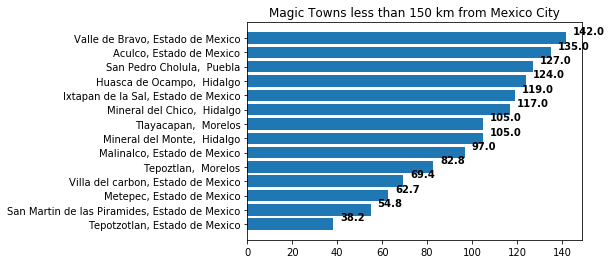

In [35]:

# Make fake dataset for plotting
height = close_mexico["Distance(kms)"]
bars = close_mexico["Ciudad y Estado"]
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)


for i, v in enumerate(height):
    plt.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.title("Magic Towns less than 150 km from Mexico City")
plt.savefig('Outputs/Distancecdmx.png',bbox_inches='tight') 
# Show graphic
plt.show()

In [36]:
#Reduce Dataframe to magictowns closer to 300 kms from Guadalajara and sort in descending order
close_guad=guad_df[guad_df["Distance(kms)"] <300]
close_guad=close_guad.sort_values("Distance(kms)")
close_guad

,Ciudad Origen,Ciudad y Estado,Distance,Duration,Distance(kms)
82,Guadalajara,"San Pedro Tlaquepaque, Jalisco",6.0 km,12 mins,6.0
99,Guadalajara,"Tequila, Jalisco",68.7 km,1 hour 6 mins,68.7
101,Guadalajara,"Teul de Gonzalez Ortega, Zacatecas",125 km,2 hours 26 mins,125.0
92,Guadalajara,"Tapalpa, Jalisco",129 km,2 hours 4 mins,129.0
53,Guadalajara,"Mazamitla, Jalisco",135 km,2 hours 12 mins,135.0
41,Guadalajara,"Jala, Nayarit",139 km,1 hour 54 mins,139.0
45,Guadalajara,"Jiquilpan de Juarez, Michoacan",140 km,1 hour 58 mins,140.0
63,Guadalajara,"Nochistlan, Zacatecas",166 km,2 hours 21 mins,166.0
42,Guadalajara,"Jalpa de Canovas, Guanajuato",183 km,2 hours 44 mins,183.0
46,Guadalajara,"Lagos de Moreno, Jalisco",187 km,2 hours 18 mins,187.0


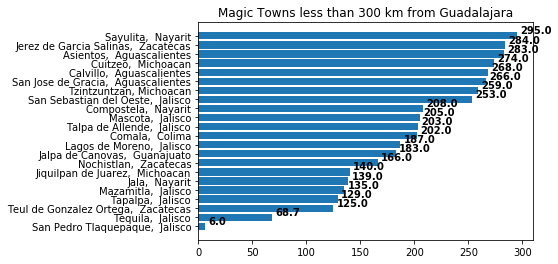

In [37]:
# Make fake dataset for plotting
height = close_guad["Distance(kms)"]
bars = close_guad["Ciudad y Estado"]
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.title("Magic Towns less than 300 km from Guadalajara")


for i, v in enumerate(height):
    plt.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
plt.savefig('Outputs/Distancegdl.png',bbox_inches='tight') 
# Show graphic
plt.show()

# THE END